<a href="https://colab.research.google.com/github/pandian-raja/EVA4_Session10/blob/master/Session_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install albumentations
!pip install torchsummary
from torchsummary import summary
import numpy as np
!pip install torch-lr-finder

     |████████████████████████████████| 634kB 4.5MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=9990125de35f7afca5b64a435e4fe63d95fe28b5807baf29bff01d751363c1bc
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [2]:
!git clone https://github.com/pandian-raja/EVA4.git

Cloning into 'EVA4'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 134 (delta 57), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (134/134), 36.19 KiB | 712.00 KiB/s, done.
Resolving deltas: 100% (57/57), done.


In [3]:
import EVA4.model.resnet as rs
import EVA4.train_and_validate.train_and_validate as tv
import EVA4.DataLoader.GetData as gd
from EVA4.utils.utils import visualize_cam, Normalize
from EVA4.utils.gradcam import GradCAM, GradCAMpp
import EVA4.utils.GradCamHelper as gch
import EVA4.visuals.test_validation_graph as graph

  pip install torch-lr-finder -v --global-option="amp"


In [4]:
trainloader, testloader, classes, device = gd.GetData.importDataset()

CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
model = rs.ResNet18().to(device);

Loss=11.322546005249023 Batch_id=12499 Accuracy=39.85: 100%|██████████| 12500/12500 [04:15<00:00, 48.84it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -3.1121, Accuracy: 5808/10000 (58.08%)



Loss=9.250921249389648 Batch_id=12499 Accuracy=55.40: 100%|██████████| 12500/12500 [04:17<00:00, 48.57it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -4.1617, Accuracy: 6922/10000 (69.22%)



Loss=8.14506721496582 Batch_id=12499 Accuracy=63.45: 100%|██████████| 12500/12500 [04:23<00:00, 47.47it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -4.6214, Accuracy: 7248/10000 (72.48%)



Loss=7.652593612670898 Batch_id=12499 Accuracy=68.51: 100%|██████████| 12500/12500 [04:21<00:00, 47.75it/s]

Epoch     4: reducing learning rate of group 0 to 1.0000e-05.



  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.1454, Accuracy: 7677/10000 (76.77%)



Loss=6.931762218475342 Batch_id=12499 Accuracy=75.13: 100%|██████████| 12500/12500 [04:22<00:00, 47.64it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.7297, Accuracy: 8090/10000 (80.90%)



Loss=7.19752311706543 Batch_id=12499 Accuracy=76.54: 100%|██████████| 12500/12500 [04:24<00:00, 47.20it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.7276, Accuracy: 8153/10000 (81.53%)



Loss=6.351125240325928 Batch_id=12499 Accuracy=77.16: 100%|██████████| 12500/12500 [04:25<00:00, 47.09it/s]

Epoch     7: reducing learning rate of group 0 to 1.0000e-06.



  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0053, Accuracy: 8154/10000 (81.54%)



Loss=6.95009183883667 Batch_id=12499 Accuracy=78.12: 100%|██████████| 12500/12500 [04:26<00:00, 46.95it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.8953, Accuracy: 8247/10000 (82.47%)



Loss=6.3287529945373535 Batch_id=12499 Accuracy=78.67: 100%|██████████| 12500/12500 [04:27<00:00, 46.71it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9397, Accuracy: 8253/10000 (82.53%)



Loss=6.230208873748779 Batch_id=12499 Accuracy=78.32: 100%|██████████| 12500/12500 [04:33<00:00, 45.62it/s]

Epoch    10: reducing learning rate of group 0 to 1.0000e-07.



  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9428, Accuracy: 8249/10000 (82.49%)



Loss=6.229653835296631 Batch_id=12499 Accuracy=78.72: 100%|██████████| 12500/12500 [04:45<00:00, 43.82it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0922, Accuracy: 8245/10000 (82.45%)



Loss=6.1965413093566895 Batch_id=12499 Accuracy=78.50: 100%|██████████| 12500/12500 [04:31<00:00, 45.97it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.8902, Accuracy: 8242/10000 (82.42%)



Loss=6.240716934204102 Batch_id=12499 Accuracy=78.53: 100%|██████████| 12500/12500 [04:29<00:00, 46.39it/s]


Epoch    13: reducing learning rate of group 0 to 1.0000e-08.


  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9184, Accuracy: 8223/10000 (82.23%)



Loss=6.083190441131592 Batch_id=12499 Accuracy=78.66: 100%|██████████| 12500/12500 [04:29<00:00, 46.32it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0019, Accuracy: 8257/10000 (82.57%)



Loss=7.225910186767578 Batch_id=12499 Accuracy=78.50: 100%|██████████| 12500/12500 [04:27<00:00, 46.73it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0236, Accuracy: 8266/10000 (82.66%)



Loss=6.490945339202881 Batch_id=12499 Accuracy=78.62: 100%|██████████| 12500/12500 [04:27<00:00, 46.66it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0210, Accuracy: 8240/10000 (82.40%)



Loss=6.3197174072265625 Batch_id=12499 Accuracy=78.48: 100%|██████████| 12500/12500 [04:27<00:00, 46.75it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9943, Accuracy: 8232/10000 (82.32%)



Loss=6.3087897300720215 Batch_id=12499 Accuracy=78.54: 100%|██████████| 12500/12500 [04:29<00:00, 46.35it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0202, Accuracy: 8257/10000 (82.57%)



Loss=6.284002304077148 Batch_id=12499 Accuracy=78.67: 100%|██████████| 12500/12500 [04:30<00:00, 46.19it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0748, Accuracy: 8279/10000 (82.79%)



Loss=6.528382778167725 Batch_id=12499 Accuracy=78.41: 100%|██████████| 12500/12500 [04:30<00:00, 46.27it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0641, Accuracy: 8256/10000 (82.56%)



Loss=6.638460159301758 Batch_id=12499 Accuracy=78.55: 100%|██████████| 12500/12500 [04:29<00:00, 46.34it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9301, Accuracy: 8244/10000 (82.44%)



Loss=6.454519748687744 Batch_id=12499 Accuracy=78.66: 100%|██████████| 12500/12500 [04:33<00:00, 45.74it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0055, Accuracy: 8210/10000 (82.10%)



Loss=6.711006164550781 Batch_id=12499 Accuracy=78.48: 100%|██████████| 12500/12500 [04:43<00:00, 44.07it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9780, Accuracy: 8234/10000 (82.34%)



Loss=6.805599212646484 Batch_id=12499 Accuracy=78.59: 100%|██████████| 12500/12500 [04:38<00:00, 44.88it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.1567, Accuracy: 8216/10000 (82.16%)



Loss=6.854016304016113 Batch_id=12499 Accuracy=78.37: 100%|██████████| 12500/12500 [04:35<00:00, 45.41it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9100, Accuracy: 8237/10000 (82.37%)



Loss=6.151113033294678 Batch_id=12499 Accuracy=78.63: 100%|██████████| 12500/12500 [04:28<00:00, 46.55it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9966, Accuracy: 8224/10000 (82.24%)



Loss=6.087406635284424 Batch_id=12499 Accuracy=78.81: 100%|██████████| 12500/12500 [04:25<00:00, 47.09it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.1129, Accuracy: 8276/10000 (82.76%)



Loss=6.32230281829834 Batch_id=12499 Accuracy=78.74: 100%|██████████| 12500/12500 [04:23<00:00, 47.40it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9985, Accuracy: 8234/10000 (82.34%)



Loss=6.66916036605835 Batch_id=12499 Accuracy=78.60: 100%|██████████| 12500/12500 [04:27<00:00, 46.80it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.1230, Accuracy: 8240/10000 (82.40%)



Loss=6.791753768920898 Batch_id=12499 Accuracy=78.62: 100%|██████████| 12500/12500 [04:29<00:00, 46.44it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9463, Accuracy: 8237/10000 (82.37%)



Loss=6.580806732177734 Batch_id=12499 Accuracy=78.57: 100%|██████████| 12500/12500 [04:30<00:00, 46.15it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.1015, Accuracy: 8261/10000 (82.61%)



Loss=6.535205841064453 Batch_id=12499 Accuracy=78.69: 100%|██████████| 12500/12500 [04:27<00:00, 46.76it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9017, Accuracy: 8206/10000 (82.06%)



Loss=7.812076568603516 Batch_id=12499 Accuracy=78.45: 100%|██████████| 12500/12500 [04:34<00:00, 45.60it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0270, Accuracy: 8254/10000 (82.54%)



Loss=6.650559425354004 Batch_id=12499 Accuracy=78.76: 100%|██████████| 12500/12500 [04:22<00:00, 47.63it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0354, Accuracy: 8224/10000 (82.24%)



Loss=6.793829917907715 Batch_id=12499 Accuracy=78.66: 100%|██████████| 12500/12500 [04:20<00:00, 48.03it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9700, Accuracy: 8224/10000 (82.24%)



Loss=6.396628379821777 Batch_id=12499 Accuracy=78.63: 100%|██████████| 12500/12500 [04:31<00:00, 46.01it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.8823, Accuracy: 8262/10000 (82.62%)



Loss=6.528171539306641 Batch_id=12499 Accuracy=78.48: 100%|██████████| 12500/12500 [04:25<00:00, 47.02it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0841, Accuracy: 8269/10000 (82.69%)



Loss=6.14285135269165 Batch_id=12499 Accuracy=78.70: 100%|██████████| 12500/12500 [04:25<00:00, 47.06it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -5.9308, Accuracy: 8234/10000 (82.34%)



Loss=6.4170379638671875 Batch_id=12499 Accuracy=78.53: 100%|██████████| 12500/12500 [04:28<00:00, 46.53it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: -6.0195, Accuracy: 8248/10000 (82.48%)



Loss=6.889902114868164 Batch_id=12499 Accuracy=78.69: 100%|██████████| 12500/12500 [04:29<00:00, 46.33it/s]



Test set: Average loss: -6.0475, Accuracy: 8183/10000 (81.83%)



Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



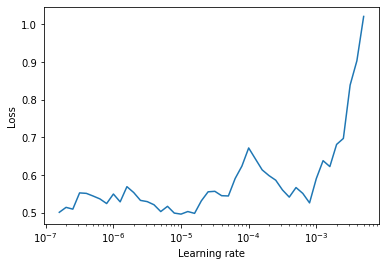

In [8]:
train_losses, train_acc, model,img,true_wrong,pred_wrong,test_acc,test_losses,lr_finder = tv.train( model= model, device = device, train_loader = trainloader, test_loader = testloader, EPOCH = 40,
                                                                                        FACTOR = 0.1, PATIENCE = 2, MOMENTUM = 0.9, LEARNING_RATE = 1e-4 )

In [17]:
resnet_model_dict = dict(type='resnet', arch=model, layer_name='layer4', input_size=(32, 32))
resnet_gradcam = GradCAM(resnet_model_dict, True)
resnet_gradcampp = GradCAMpp(resnet_model_dict, True)


saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


Classes in order Actual and Predicted


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


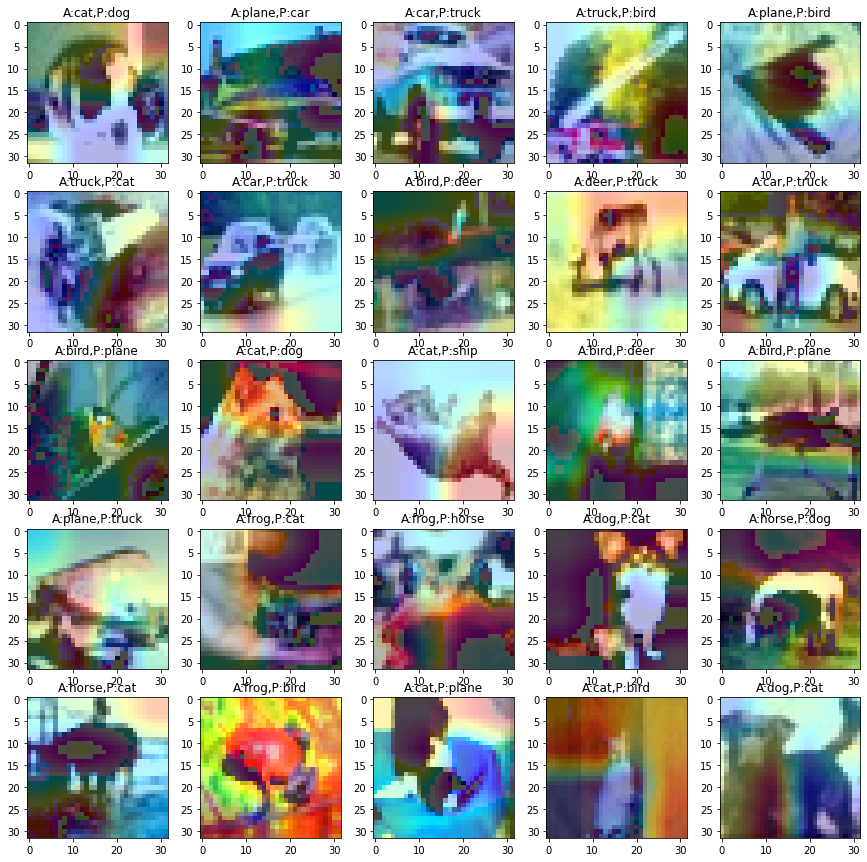

In [18]:
gch.wrong_plot(true_wrong,img,pred_wrong,25,resnet_gradcam,classes)

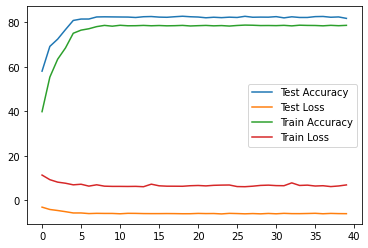

In [19]:
graph.test_validation_graph(test_acc,test_losses,train_acc, train_losses)

In [0]:
lr_finder.history['lr']
lr_finder.history['loss']

In [24]:
lr_finder.best_loss

0.4109608829021454

In [29]:
lr_finder.history['lr']

[1.5848931924611143e-08,
 1.9952623149688803e-08,
 2.511886431509581e-08,
 3.1622776601683805e-08,
 3.9810717055349736e-08,
 5.0118723362727256e-08,
 6.309573444801935e-08,
 7.943282347242817e-08,
 1.0000000000000005e-07,
 1.2589254117941675e-07,
 1.5848931924611138e-07,
 1.9952623149688806e-07,
 2.511886431509581e-07,
 3.16227766016838e-07,
 3.981071705534974e-07,
 5.011872336272726e-07,
 6.309573444801934e-07,
 7.943282347242818e-07,
 1.0000000000000006e-06,
 1.2589254117941672e-06,
 1.5848931924611139e-06,
 1.9952623149688804e-06,
 2.51188643150958e-06,
 3.16227766016838e-06,
 3.981071705534974e-06,
 5.011872336272727e-06,
 6.309573444801938e-06,
 7.943282347242813e-06,
 1e-05,
 1.2589254117941675e-05,
 1.584893192461114e-05,
 1.9952623149688807e-05,
 2.5118864315095822e-05,
 3.162277660168378e-05,
 3.981071705534972e-05,
 5.011872336272723e-05,
 6.309573444801935e-05,
 7.94328234724282e-05,
 0.00010000000000000007,
 0.0001258925411794167,
 0.0001584893192461113,
 0.0001995262314968